# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from workflow_widgets import WorkflowWidget, WorkerPoolWidget, TailWidget
from droplet_workflow import droplet_wf
from example_workflow import example_wf
from aux_widgets import QueueWidget, NEWTAuthWidget, SSHAuthWidget, SSHTerminal, Space
import workflow_objects as kale

import ipywidgets as ipw
import time
from concurrent.futures import ThreadPoolExecutor
import traitlets
import networkx as nx
import IPython.display as disp

In [3]:
wpw = WorkerPoolWidget()
wpw

2017-10-18 22:18:16,253 INFO Performing db tune-up
2017-10-18 22:18:16,264 INFO LaunchPad was RESET.


WorkerPoolWidget(children=(HTML(value='<h3>Worker Pools</h3>'), TableWidget(children=(RowWidget(children=(HBox(children=(HTML(value='<b>Name</b>'),), layout=Layout(justify_content='flex-start', width='150px')), HBox(children=(HTML(value='<b>Location</b>'),), layout=Layout(justify_content='flex-start', width='200px')), HBox(children=(HTML(value='<b>Workers</b>'),), layout=Layout(justify_content='flex-start', width='60px')), HBox(children=(HTML(value='<b>Action</b>'),), layout=Layout(justify_content='flex-start', width='100px'))), layout=Layout(justify_content='space-between', width='510px')), RowWidget(children=(HBox(children=(HTML(value='default'),), layout=Layout(justify_content='flex-start', width='150px')), HBox(children=(HTML(value='localhost'),), layout=Layout(justify_content='flex-start', width='200px')), HBox(children=(HTML(value='16'),), layout=Layout(justify_content='flex-start', width='60px')), HBox(children=(Button(button_style='danger', description='Remove', style=ButtonStyle()),), layout=Layout(justify_content='flex-start', width='100px'))), layout=Layout(justify_content='space-between', width='510px')), RowWidget(children=(HBox(children=(Text(value='', layout=Layout(width='148px')),), layout=Layout(justify_content='flex-start', width='150px')), HBox(children=(Dropdown(layout=Layout(width='198px'), options=('localhost',), value='localhost'),), layout=Layout(justify_content='flex-start', width='200px')), HBox(children=(IntText(value=1, layout=Layout(width='58px')),), layout=Layout(justify_content='flex-start', width='60px')), HBox(children=(Button(button_style='success', icon='plus', style=ButtonStyle()),), layout=Layout(justify_content='flex-start', width='100px'))), layout=Layout(justify_content='space-between', width='510px'))), layout=Layout(width='510px')), HTML(value='\n        <div class="alert alert-success" style="width: 510px">\n        WorkerPool \'default\' created.\n        </div>\n        ')))

# Define simple workflow

In [4]:
d1 = nx.DiGraph(
    [[0,4],
     [1,4],
     [2,5],
     [2,6],
     [3,6],
     [3,7],
     [4,8],
     [4,9],
     [5,10],
     [6,11],
     [7,11]
    ]
)

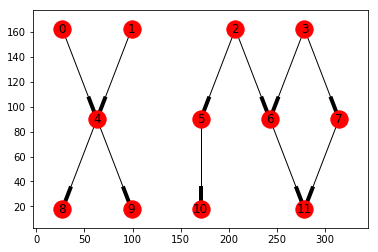

In [5]:
pos = nx.nx_pydot.graphviz_layout(d1, prog='dot')
nx.draw_networkx(d1, pos)

In [10]:
test_wf = kale.Workflow('test')
test_wf.example_from_dag(d1)
test_wfw = WorkflowWidget(test_wf, wpw)
test_wfw

WorkflowWidget(children=(VBox(children=(Figure(fig_margin={'left': 10, 'right': 10, 'bottom': 10, 'top': 10}, layout=Layout(height='600px', width='400px'), marks=[Graph(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], highlight_links=False, interactions={'hover': 'tooltip', 'click': 'select'}, link_data=[{'source': 0, 'target': 4}, {'source': 1, 'target': 4}, {'source': 2, 'target': 5}, {'source': 2, 'target': 6}, {'source': 3, 'target': 6}, {'source': 3, 'target': 7}, {'source': 4, 'target': 8}, {'source': 4, 'target': 9}, {'source': 5, 'target': 10}, {'source': 6, 'target': 11}, {'source': 7, 'target': 11}], link_type='line', node_data=[{'label': '0', 'shape': 'rect', 'name': '0', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 0'}, {'label': '1', 'shape': 'rect', 'name': '1', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 1'}, {'label': '2', 'shape': 'rect', 'name': '2', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 2'}, {'label': '3', 'shape': 'rect', 'name': '3', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 3'}, {'label': '4', 'shape': 'rect', 'name': '4', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 4'}, {'label': '5', 'shape': 'rect', 'name': '5', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 5'}, {'label': '6', 'shape': 'rect', 'name': '6', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 6'}, {'label': '7', 'shape': 'rect', 'name': '7', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 7'}, {'label': '8', 'shape': 'rect', 'name': '8', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 8'}, {'label': '9', 'shape': 'rect', 'name': '9', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 9'}, {'label': '10', 'shape': 'rect', 'name': '10', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 10'}, {'label': '11', 'shape': 'rect', 'name': '11', 'task_type': 'CommandLineTask', 'tags': [], 'input_files': [], 'output_files': [], 'num_cores': 1, 'command': 'echo 11'}], scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'link_color': {'dimension': 'link_color'}}, selected=[0], selected_style={'stroke': 'red'}, tooltip_style={'opacity': 0.9}, x=array([  336.,   890.,  1721.,  2414.,   336.,  1548.,  2102.,  2657.,
         267.,   820.,  1548.,  2381.]), y=array([ 162.,  162.,  162.,  162.,   90.,   90.,   90.,   90.,   18.,
         18.,   18.,   18.]))], min_aspect_ratio=0.0, scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0)), Toolbar(figure=Figure(fig_margin={'left': 10, 'right': 10, 'bottom': 10, 'top': 10}, layout=Layout(height='600px', width='400px'), marks=[Graph(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], highlight_links=False, interactions={'hover': 'tooltip', 'click': 'select'}, link_data=[{'source': 0, 'target': 4}, {'source': 1, 'target': 4}, {'source': 2, 'target': 5}, {'source': 2, 'target': 6}, {'source': 3, 'target': 6}, {'source': 3, 'target': 7}, {'source': 4, 'target': 8}, {'source': 4, 'target': 9}, {'source': 5, 'targ

# Observe Output

In [7]:
t = TailWidget('out.txt')
t

TailWidget(children=(HTML(value='<b>File Tailer</b>'), VBox(children=(HBox(children=(Text(value='out.txt', description='File path'), Button(button_style='success', description='Start', style=ButtonStyle())), layout=Layout(width='478px')), HBox(children=(FloatText(value=1.0, description='dt', layout=Layout(width='150px')), IntText(value=20, description='# of lines', layout=Layout(width='150px'))), layout=Layout(width='478px')))), Box(layout=Layout(height='10px', width='0px')), Box(children=(HTML(value=''),), layout=Layout(border='1px lightgray solid', padding='10px', width='478px'))), layout=Layout(border='1px lightgray solid', padding='10px', width='500px'))

In [8]:
b1 = ipw.Button(description="test")
b2 = ipw.Button(description="123")
ipw.VBox([b1,b2])

VBox(children=(Button(description='test', style=ButtonStyle()), Button(description='123', style=ButtonStyle())))

In [9]:
b2.

SyntaxError: invalid syntax (<ipython-input-9-3f8e79ce2790>, line 1)

# STOP HERE

In [ ]:
example_workflow = kale.Workflow(name='example')
for i in range(50):
    example_workflow.add_task(
        kale.CommandLineTask(
            name='stress_test_{num}',
            command='stress --cpu 1 --timeout 30',
            nodes_cores = 10,
            node_property='node',
            tags=['run'],
            output_files=["{out_file}"],
            params=dict(
                num=i,
                out_file="output.txt"
            )
        )
    )

In [ ]:
ww1 = WorkflowWidget(example_workflow, wpw)
ww1

In [ ]:
import os

In [ ]:
os.path.join('a','b','c')

In [ ]:
ww1._log_area

In [ ]:
wfw.workflow.tag_dict

In [ ]:
wfw.workflow._new_tag('newtag')

In [ ]:
wfw._update_tag_selector()

# Connect to Cluster


$\sqrt{x}$

In [ ]:
ssh = SSHAuthWidget(host='cori.nersc.gov', username='oevans')
ssh

In [ ]:
t = SSHTerminal(ssh, width=800)
t

# Create Worker Pool


# Droplet Workflow

In [11]:
ww = WorkflowWidget(workflow=droplet_wf, worker_pool_widget=wpw)
ww

2017-10-18 22:22:12,350 INFO Checking for FWs to run...
2017-10-18 22:22:13,432 INFO Checking for FWs to run...
2017-10-18 22:22:14,577 INFO Checking for FWs to run...
FW Completed


WorkflowWidget(children=(VBox(children=(Figure(fig_margin={'left': 10, 'right': 10, 'bottom': 10, 'top': 10}, layout=Layout(height='600px', width='400px'), marks=[Graph(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], highlight_links=False, interactions={'hover': 'tooltip', 'click': 'select'}, link_data=[{'source': 0, 'target': 2}, {'source': 0, 'target': 12}, {'source': 0, 'target': 22}, {'source': 0, 'target': 32}, {'source': 0, 'target': 42}, {'source': 0, 'target': 52}, {'source': 1, 'target': 2}, {'source': 2, 'target': 3}, {'source': 3, 'target': 4}, {'source': 3, 'target': 6}, {'source': 3, 'target': 8}, {'source': 4, 'target': 5}, {'source': 5, 'target': 10}, {'source': 6, 'target': 7}, {'source': 7, 'target': 10}, {'source': 8, 'target': 9}, {'source': 9, 'target': 10}, {'source': 10, 'target': 61}, {'source': 11, 'target': 12}, {'source': 12, 'target': 13}, {'source': 13, 'target': 14}, {'source': 13, 'target': 16}, {'source': 13, 'target': 18}, {'source': 14, 'target': 15}, {'source': 15, 'target': 20}, {'source': 16, 'target': 17}, {'source': 17, 'target': 20}, {'source': 18, 'target': 19}, {'source': 19, 'target': 20}, {'source': 20, 'target': 61}, {'source': 21, 'target': 22}, {'source': 22, 'target': 23}, {'source': 23, 'target': 24}, {'source': 23, 'target': 26}, {'source': 23, 'target': 28}, {'source': 24, 'target': 25}, {'source': 25, 'target': 30}, {'source': 26, 'target': 27}, {'source': 27, 'target': 30}, {'source': 28, 'target': 29}, {'source': 29, 'target': 30}, {'source': 30, 'target': 61}, {'source': 31, 'target': 32}, {'source': 32, 'target': 33}, {'source': 33, 'target': 34}, {'source': 33, 'target': 36}, {'source': 33, 'target': 38}, {'source': 34, 'target': 35}, {'source': 35, 'target': 40}, {'source': 36, 'target': 37}, {'source': 37, 'target': 40}, {'source': 38, 'target': 39}, {'source': 39, 'target': 40}, {'source': 40, 'target': 61}, {'source': 41, 'target': 42}, {'source': 42, 'target': 43}, {'source': 43, 'target': 44}, {'source': 43, 'target': 46}, {'source': 43, 'target': 48}, {'source': 44, 'target': 45}, {'source': 45, 'target': 50}, {'source': 46, 'target': 47}, {'source': 47, 'target': 50}, {'source': 48, 'target': 49}, {'source': 49, 'target': 50}, {'source': 50, 'target': 61}, {'source': 51, 'target': 52}, {'source': 52, 'target': 53}, {'source': 53, 'target': 54}, {'source': 53, 'target': 56}, {'source': 53, 'target': 58}, {'source': 54, 'target': 55}, {'source': 55, 'target': 60}, {'source': 56, 'target': 57}, {'source': 57, 'target': 60}, {'source': 58, 'target': 59}, {'source': 59, 'target': 60}, {'source': 60, 'target': 61}, {'source': 61, 'target': 62}], link_type='line', node_data=[{'label': '0', 'shape': 'rect', 'name': 'gen_mica_10x10', 'task_type': 'CommandLineTask', 'tags': ['gen_mica'], 'input_files': [], 'output_files': ['$SCRATCH/droplet/gen_droplet/lammps_data/mica_10x10.data'], 'num_cores': 1, 'command': '$SCRATCH/droplet/gen_droplet/scripts/gen_mica.sh 10 10 $SCRATCH/droplet/gen_droplet/lammps_data/mica_10x10.data'}, {'label': '1', 'shape': 'rect', 'name': 'gen_droplet-20A', 'task_type': 'CommandLineTask', 'tags': ['20A', 'gen_droplet'], 'input_files': [], 'output_files': ['$SCRATCH/droplet/gen_droplet/dump/droplet_20A.lammpstrj'], 'num_cores': 1, 'command': '$SCRATCH/droplet/gen_droplet/bin/waterdroplet_tip4p_new.out 20 sphere'}, {'label': '2', 'shape': 'rect', 'name': 'combine-20A', 'task_type': 'CommandLineTask', 'tags': ['20A', 'combine'], 'input_files': ['$SCRATCH/droplet/gen_droplet/lammps_data/mica_10x10.data', '$SCRATCH/droplet/gen_droplet/dump/droplet_20A.lammpstrj'], 'output_files': ['$SCRATCH/droplet/gen_droplet/lammps_data/droplet_on_mica-20A.data'], 'num_cores': 1, 'command': '$SCRATCH/droplet/gen_droplet/scripts/combine_sub_strip.pl $SCRATCH/droplet/gen_droplet/lammps_data/mica_10x10.data $SCRATCH/droplet/gen_droplet/dump/droplet_20A.lammpstrj 20'}, {'label': '3', 'shape': 'rect', 'na

2017-10-18 22:22:37,343 INFO Checking for FWs to run...
2017-10-18 22:22:37,764 INFO Checking for FWs to run...
2017-10-18 22:22:38,350 INFO Checking for FWs to run...
2017-10-18 22:22:39,358 INFO Checking for FWs to run...
2017-10-18 22:22:40,364 INFO Checking for FWs to run...
2017-10-18 22:22:41,373 INFO Checking for FWs to run...
2017-10-18 22:22:42,381 INFO Checking for FWs to run...
2017-10-18 22:22:42,856 INFO Checking for FWs to run...
2017-10-18 22:22:43,387 INFO Checking for FWs to run...
2017-10-18 22:22:44,396 INFO Checking for FWs to run...
2017-10-18 22:22:45,402 INFO Checking for FWs to run...
FW Completed


# Visualize & Run Workflow

In [ ]:
exww.workflow.tag_dict

In [ ]:
selected = exww.bqgraph.selected
tasks = [exww.bqgraph.node_data[x]['name'] for x in selected]
[exww.workflow.get_task_by_name(name) for name in tasks]

In [ ]:
nx.dfs_preorder_nodes?

In [ ]:
exww.workflow.dag.o(node)

In [ ]:
exww.bqgraph.selected = list(range(5))

In [ ]:
example_wf.dag.nodes()[1].children

# Connect to NEWT

In [ ]:
a = NEWTAuthWidget()
a

In [ ]:
q = QueueWidget(a)
q